MLPClassifier example 

In [2]:
import numpy as np 
import pandas as pd 

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

## Load in the file Dataset_spine.csv

- Use Pandas
- Drop the column Unnamed: 13

Always inspect the dataframe using .head()

In [4]:
df = pd.read_csv('Dataset_spine.csv')



In [7]:
df.head()

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12,Class_att
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,Abnormal


Also drop ['Col7','Col8','Col9','Col10','Col11','Col12']

In [16]:
# your code here
# Drop the columns listed in columns_to_drop if they exist
columns_to_drop = ['Col7', 'Col8', 'Col9', 'Col10', 'Col11', 'Col12']
existing_columns = [col for col in columns_to_drop if col in df.columns]
if existing_columns:
    df = df.drop(existing_columns, axis=1)


In [10]:
df.head()

,Col1,Col2,Col3,Col4,Col5,Col6,Class_att
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


This will show the classes, obviously that column will be our y, the rest will be X

In [17]:
df["Class_att"].unique()

array(['Abnormal', 'Normal'], dtype=object)

Binary Classifier

import the things we need from sklearn.neural_network import MLPClassifier

train_test_split
confusion_matrix

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

Set the variables X and y by picking the columns as discussed above

Do a train_test_split, use a fixed random_state and make the test_size be 25%

In [22]:
# Set X as all columns except 'Class_att'
X = df.drop('Class_att', axis=1)

# Set y as the 'Class_att' column
y = df['Class_att']




In [21]:
# Perform train-test split with 25% test size and fixed random state
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [20]:
# Print shapes to verify the split
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (232, 6)
X_test shape: (78, 6)
y_train shape: (232,)
y_test shape: (78,)


Now lets use MLPClassifier from sklearn

Do for 3 hidden layers with 100 units in each

set tol=0.000000001

use solver 'sgd'

In [23]:
# Create the MLPClassifier with specified parameters
mlp = MLPClassifier(
    hidden_layer_sizes=(100, 100, 100),  # 3 hidden layers with 100 units each
    tol=0.000000001,                     # Very small tolerance
    solver='sgd',                        # Stochastic gradient descent
    random_state=42                      # For reproducibility
)

fit the classifier using training

In [24]:
# Fit the MLPClassifier on the training data
mlp.fit(X_train, y_train)

# Print out the training details
print(f"Number of iterations: {mlp.n_iter_}")
print(f"Loss: {mlp.loss_}")


Number of iterations: 52
Loss: 0.34975704079039704


Get y_pred using .predict

In [25]:
# Get predictions using the trained model
y_pred = mlp.predict(X_test)

# Print the first few predictions
print("First few predictions:", y_pred[:5])
print(f"Shape of predictions: {y_pred.shape}")

First few predictions: ['Abnormal' 'Normal' 'Abnormal' 'Abnormal' 'Abnormal']
Shape of predictions: (78,)


Get the accuracy score

In [26]:
from sklearn.metrics import accuracy_score

# Get accuracy score by comparing predictions to actual values
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.7564


Get the Confusion Matrix

In [27]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[53  4]
 [15  6]]


Let's view a heatmap with the confusion matrix

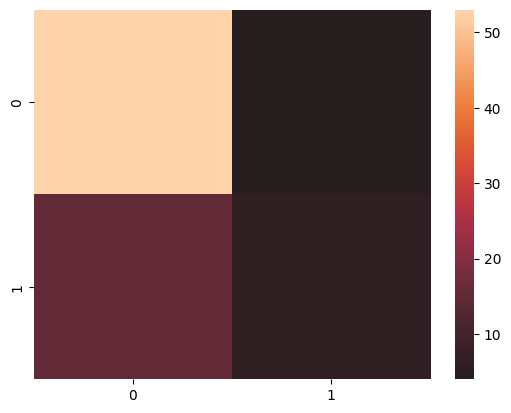

In [28]:
sns.heatmap(cm, center=True)
plt.show()

# Tensorflow

Now what about Tensorflow??

In [29]:
import tensorflow as tf

2025-03-24 15:20:36.922041: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-24 15:20:36.936088: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1742829636.951659    6367 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1742829636.956110    6367 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1742829636.968877    6367 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

Set up a new sequential model, call it model_tf

Have 3 hidden layers, each with activation relu

have an output layer with only 1 unit, no activation function

Should you also set up a normaliser as well. See example workbooks

In [ ]:
# Create the TensorFlow sequential model
model_tf = tf.keras.Sequential([
    # Normalizing layer to standardize inputs
    tf.keras.layers.Normalization(axis=-1),
    
    # Three hidden layers with ReLU activation
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    
    # Output layer with 1 unit, no activation (for binary classification)
    tf.keras.layers.Dense(1)
])




2025-03-24 15:22:31.372293: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [31]:
# Adapt the normalization layer to the training data
model_tf.layers[0].adapt(X_train.values)


Compile the model, pick an optimizer, use Adam or tf.keras.optimizers.experimental.SGD(0.001). loss is binarycrossentropy

    metrics=['accuracy']

In [32]:
# Compile the model with Adam optimizer and binary crossentropy loss
model_tf.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
    metrics=['accuracy']
)


In [33]:
y_train

140    Abnormal
208    Abnormal
278      Normal
203    Abnormal
144    Abnormal
         ...   
188    Abnormal
71     Abnormal
106    Abnormal
270      Normal
102    Abnormal
Name: Class_att, Length: 232, dtype: object

Now try fitting, 20 epochs, do 

    X_train.values, y_train.values, epochs=20, validation_split=0.2

In [34]:
# Fit the model using 20 epochs and a 20% validation split
history = model_tf.fit(
    X_train.values, 
    y_train.values, 
    epochs=20, 
    validation_split=0.2
)



Epoch 1/20


2025-03-24 15:23:12.932555: W tensorflow/core/framework/op_kernel.cc:1833] OP_REQUIRES failed at cast_op.cc:122 : UNIMPLEMENTED: Cast string to float is not supported


UnimplementedError: Graph execution error:

Detected at node compile_loss/binary_crossentropy/Cast defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "/home/codespace/.local/lib/python3.12/site-packages/ipykernel_launcher.py", line 18, in <module>

  File "/home/codespace/.local/lib/python3.12/site-packages/traitlets/config/application.py", line 1075, in launch_instance

  File "/home/codespace/.local/lib/python3.12/site-packages/ipykernel/kernelapp.py", line 739, in start

  File "/home/codespace/.local/lib/python3.12/site-packages/tornado/platform/asyncio.py", line 205, in start

  File "/usr/local/python/3.12.1/lib/python3.12/asyncio/base_events.py", line 638, in run_forever

  File "/usr/local/python/3.12.1/lib/python3.12/asyncio/base_events.py", line 1971, in _run_once

  File "/usr/local/python/3.12.1/lib/python3.12/asyncio/events.py", line 84, in _run

  File "/home/codespace/.local/lib/python3.12/site-packages/ipykernel/kernelbase.py", line 545, in dispatch_queue

  File "/home/codespace/.local/lib/python3.12/site-packages/ipykernel/kernelbase.py", line 534, in process_one

  File "/home/codespace/.local/lib/python3.12/site-packages/ipykernel/kernelbase.py", line 437, in dispatch_shell

  File "/home/codespace/.local/lib/python3.12/site-packages/ipykernel/ipkernel.py", line 362, in execute_request

  File "/home/codespace/.local/lib/python3.12/site-packages/ipykernel/kernelbase.py", line 778, in execute_request

  File "/home/codespace/.local/lib/python3.12/site-packages/ipykernel/ipkernel.py", line 449, in do_execute

  File "/home/codespace/.local/lib/python3.12/site-packages/ipykernel/zmqshell.py", line 549, in run_cell

  File "/home/codespace/.local/lib/python3.12/site-packages/IPython/core/interactiveshell.py", line 3075, in run_cell

  File "/home/codespace/.local/lib/python3.12/site-packages/IPython/core/interactiveshell.py", line 3130, in _run_cell

  File "/home/codespace/.local/lib/python3.12/site-packages/IPython/core/async_helpers.py", line 128, in _pseudo_sync_runner

  File "/home/codespace/.local/lib/python3.12/site-packages/IPython/core/interactiveshell.py", line 3334, in run_cell_async

  File "/home/codespace/.local/lib/python3.12/site-packages/IPython/core/interactiveshell.py", line 3517, in run_ast_nodes

  File "/home/codespace/.local/lib/python3.12/site-packages/IPython/core/interactiveshell.py", line 3577, in run_code

  File "/tmp/ipykernel_6367/527915436.py", line 2, in <module>

  File "/usr/local/python/3.12.1/lib/python3.12/site-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/python/3.12.1/lib/python3.12/site-packages/keras/src/backend/tensorflow/trainer.py", line 371, in fit

  File "/usr/local/python/3.12.1/lib/python3.12/site-packages/keras/src/backend/tensorflow/trainer.py", line 219, in function

  File "/usr/local/python/3.12.1/lib/python3.12/site-packages/keras/src/backend/tensorflow/trainer.py", line 132, in multi_step_on_iterator

  File "/usr/local/python/3.12.1/lib/python3.12/site-packages/keras/src/backend/tensorflow/trainer.py", line 113, in one_step_on_data

  File "/usr/local/python/3.12.1/lib/python3.12/site-packages/keras/src/backend/tensorflow/trainer.py", line 60, in train_step

  File "/usr/local/python/3.12.1/lib/python3.12/site-packages/keras/src/trainers/trainer.py", line 383, in _compute_loss

  File "/usr/local/python/3.12.1/lib/python3.12/site-packages/keras/src/trainers/trainer.py", line 351, in compute_loss

  File "/usr/local/python/3.12.1/lib/python3.12/site-packages/keras/src/trainers/compile_utils.py", line 690, in __call__

  File "/usr/local/python/3.12.1/lib/python3.12/site-packages/keras/src/trainers/compile_utils.py", line 699, in call

  File "/usr/local/python/3.12.1/lib/python3.12/site-packages/keras/src/losses/loss.py", line 63, in __call__

  File "/usr/local/python/3.12.1/lib/python3.12/site-packages/keras/src/tree/tree_api.py", line 192, in map_structure

  File "/usr/local/python/3.12.1/lib/python3.12/site-packages/keras/src/tree/optree_impl.py", line 108, in map_structure

  File "/usr/local/python/3.12.1/lib/python3.12/site-packages/optree/ops.py", line 766, in tree_map

  File "/usr/local/python/3.12.1/lib/python3.12/site-packages/keras/src/losses/loss.py", line 64, in <lambda>

  File "/usr/local/python/3.12.1/lib/python3.12/site-packages/keras/src/ops/core.py", line 958, in convert_to_tensor

  File "/usr/local/python/3.12.1/lib/python3.12/site-packages/keras/src/backend/tensorflow/core.py", line 147, in convert_to_tensor

Cast string to float is not supported
	 [[{{node compile_loss/binary_crossentropy/Cast}}]] [Op:__inference_multi_step_on_iterator_1966]

 You should get a bunch of errors

### Why this error?

Well look at y_train

In [35]:
y_train

140    Abnormal
208    Abnormal
278      Normal
203    Abnormal
144    Abnormal
         ...   
188    Abnormal
71     Abnormal
106    Abnormal
270      Normal
102    Abnormal
Name: Class_att, Length: 232, dtype: object

They're not numbers, we need to convert those to numbers. Using LabelEncoder

Scikit-learn didn't care, but Tensorflow is a "lower-level" programming tool so you need to do the conversion yourself

In [36]:
from sklearn import preprocessing

In [37]:
# your code here
# Create a LabelEncoder to convert string labels to numbers
label_encoder = preprocessing.LabelEncoder()

# Fit the encoder on the unique classes in our data
label_encoder.fit(df["Class_att"].unique())

# Display the classes and their numerical mappings
print("Classes mapping:")
for i, label in enumerate(label_encoder.classes_):
    print(f"{label} -> {i}")


Classes mapping:
Abnormal -> 0
Normal -> 1


Fit the label encoder on y_train

In [38]:
# Fit the label encoder on y_train (already created in previous cell)
label_encoder.fit(y_train)

# Check the mapping again to confirm it's correctly set
print("Classes mapping after fitting on y_train:")
for i, label in enumerate(label_encoder.classes_):
    print(f"{label} -> {i}")

Classes mapping after fitting on y_train:
Abnormal -> 0
Normal -> 1


Now transform both y_train and y_test

In [39]:
# Transform the train and test labels to numeric values
y_train_enc = label_encoder.transform(y_train)
y_test_enc = label_encoder.transform(y_test)

# Print the shapes to verify the transformation
print(f"y_train_enc shape: {y_train_enc.shape}")
print(f"y_test_enc shape: {y_test_enc.shape}")
print(f"First few values of y_train_enc: {y_train_enc[:5]}")
print(f"First few values of y_test_enc: {y_test_enc[:5]}")

y_train_enc shape: (232,)
y_test_enc shape: (78,)
First few values of y_train_enc: [0 0 1 0 0]
First few values of y_test_enc: [1 0 0 0 0]


In [40]:
y_train_enc

array([0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0])

## Fitting again

Try fitting your model again with y_train_enc. It should work now

In [41]:
# your code here

# Fit the model using the encoded training labels
history = model_tf.fit(
    X_train.values, 
    y_train_enc, 
    epochs=20, 
    validation_split=0.2
)



Epoch 1/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.6442 - loss: 0.6660 - val_accuracy: 0.6596 - val_loss: 0.5804
Epoch 2/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6372 - loss: 0.5638 - val_accuracy: 0.6596 - val_loss: 0.4999
Epoch 3/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6643 - loss: 0.4862 - val_accuracy: 0.7660 - val_loss: 0.4254
Epoch 4/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7309 - loss: 0.4145 - val_accuracy: 0.8511 - val_loss: 0.3704
Epoch 5/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7748 - loss: 0.4155 - val_accuracy: 0.8936 - val_loss: 0.3385
Epoch 6/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8760 - loss: 0.3240 - val_accuracy: 0.8936 - val_loss: 0.3163
Epoch 7/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8388 - loss: 0.3439 - val_accuracy: 0.9362 - val_loss: 0.2951
Epoch 8/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8391 - loss: 0.3388 - val_accuracy: 0.9574 - val_loss: 0.2787


Accuracy for both the training and validation sets is a little all over the place. Maybe we need more Epochs or some other way to decide when to finish. Anyway...

In [42]:
y_pred = model_tf.predict(X_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


In [43]:
np.set_printoptions(suppress=True)

In [44]:
y_pred

array([[  2.6300857 ],
       [ -9.717553  ],
       [ -0.29179832],
       [ -8.602041  ],
       [ -1.0934764 ],
       [ -1.8783352 ],
       [ -9.727088  ],
       [ -5.2657    ],
       [ -1.2545675 ],
       [ -1.1344228 ],
       [-15.300119  ],
       [-11.998724  ],
       [  1.4406996 ],
       [  1.3767918 ],
       [  2.638644  ],
       [ -0.89231837],
       [  0.52751344],
       [ -9.767001  ],
       [  0.84182847],
       [ -9.023127  ],
       [ -2.008309  ],
       [ -9.490943  ],
       [ -5.1368012 ],
       [ -9.76389   ],
       [-13.144083  ],
       [-10.745456  ],
       [ -7.046711  ],
       [  0.26929706],
       [  2.468438  ],
       [  4.9320683 ],
       [ -5.678052  ],
       [ -1.6711421 ],
       [ -6.6637797 ],
       [  2.378792  ],
       [ -4.9653845 ],
       [ -4.1958942 ],
       [ -0.26802307],
       [  1.2536746 ],
       [-12.785237  ],
       [ -2.394401  ],
       [  0.46880096],
       [ -2.3370607 ],
       [ -8.197299  ],
       [  3

Those are not probabilities. Damn. Well we need to do some more

We could have set the activation to sigmoid on the last layer and that would've given us probabilities but tensorflow manual says not to do that

In [45]:
y_probs = tf.keras.activations.sigmoid(y_pred)

Let's convert those probabilities to 0s or 1s. This is not the best way of doing this, Tensorflow almost certainly has something better, but this is how I want to do it!

In [47]:
results = pd.DataFrame(y_probs, columns=["value"])

In [48]:
results["which"] = 0

In [49]:
results.loc[results['value'] >= 0.5, 'which'] = 1

In [50]:
results

,value,which
0,0.932773,1
1,0.000060,0
2,0.427564,0
3,0.000184,0
4,0.250964,0
...,...,...
73,0.191669,0
74,0.229634,0
75,0.704244,1
76,0.110628,0


In [51]:
results.which.values

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0])

In [52]:
y_test_enc

array([1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

In [53]:
mistakes = (results.which.values != y_test_enc).sum()

In [54]:
model_tf.evaluate(X_test, y_test_enc)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8528 - loss: 0.2864 


[0.30226102471351624, 0.8461538553237915]

In [55]:
1-mistakes/78

np.float64(0.8333333333333334)

Ok, it's worse than the sklearn implementation in test data but I haven't tried anything to tweak it, sklearn you will have noticed did more epochs in its training. It also didn't use any validation set.

## More Epochs! Lower learning rate

I'm going to take the same basic structure and see what happens when I make some changes

In [56]:
model_tf = tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(1)
])

I'll also do a lower learning rate

In [57]:
model_tf.compile(
    optimizer=tf.keras.optimizers.Adam(0.0001),
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
    metrics=['accuracy']
)

Lots and lots of epochs, let's run it and store the history

In [58]:
history = model_tf.fit(X_train.values, y_train_enc, epochs=1000, validation_split=0.2)

Epoch 1/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.3517 - loss: 2.0697 - val_accuracy: 0.5106 - val_loss: 1.0103
Epoch 2/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5932 - loss: 0.9866 - val_accuracy: 0.6596 - val_loss: 0.9055
Epoch 3/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6339 - loss: 0.9780 - val_accuracy: 0.6596 - val_loss: 0.6827
Epoch 4/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6624 - loss: 0.6937 - val_accuracy: 0.7234 - val_loss: 0.4790
Epoch 5/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7160 - loss: 0.5046 - val_accuracy: 0.8723 - val_loss: 0.4701
Epoch 6/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7547 - loss: 0.4883 - val_accuracy: 0.8511 - val_loss: 0.4181
Epoch 7/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7158 - loss: 0.4603 - val_accuracy: 0.8298 - val_loss: 0.3835
Epoch 8/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6905 - loss: 0.4528 - val_accuracy: 0.8085 - v

In [59]:
model_tf.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 100)            │           700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 63,005 (246.12 KB)

 Trainable params: 21,001 (82.04 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 42,004 (164.08 KB)

In [60]:
model_tf.evaluate(X_test, y_test_enc)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7998 - loss: 0.6988 


[0.7284644842147827, 0.7948718070983887]

In [61]:
def plot_loss(history, which='loss'):
    plt.plot(history.history[which], label='train')
    try:
        plt.plot(history.history['val_'+which], label='validation')
    except:
        None
    plt.xlabel('Epoch')
    plt.ylabel(which)
    plt.legend()
    plt.grid(True)

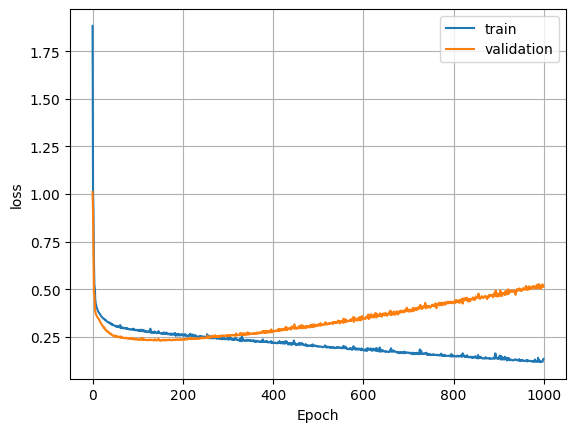

In [62]:
plot_loss(history)

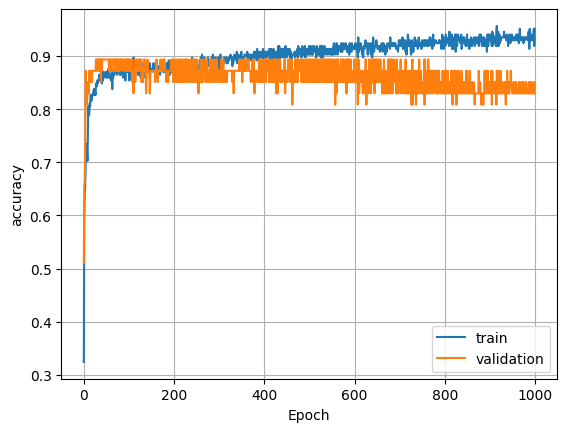

In [63]:
plot_loss(history, 'accuracy')

So probably shouldn't go for 1000 epochs, there's overfitting there

I'm going to implement Early Stopping. It's a form of regularisation - to try to prevent overfitting, and it also will train our model more quickly.

<a href="https://en.wikipedia.org/wiki/Early_stopping">Wikipedia Link</a>

<a href="https://machinelearningmastery.com/how-to-stop-training-deep-neural-networks-at-the-right-time-using-early-stopping/">More Early Stopping Detail</a>

<a href="https://towardsdatascience.com/early-stopping-a-cool-strategy-to-regularize-neural-networks-bfdeca6d722e">Another Link</a>

I mentioned it in lectures without going into any detail and will talk about it more next week.

The basic idea is, monitor how well the validation set is performing after every epoch, if there has not been any improvement in its score for a while (say in 10 epochs or whatever you pick as your "patience" - we don't just say over 1 epoch as training could just be "stuck"). MLPClassifier in sklearn has it sort of implemented and we saw it  above "Training loss did not improve more than tol=0.000000 for 10 consecutive epochs. Stopping."

It is added as a callback function that checks for what we want

In [64]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

Be careful with restore_best_weights see https://medium.com/@doleron/never-use-restore-best-weights-true-with-earlystopping-754ba5f9b0c6

In [ ]:
#callback_modelcheckpoint_loss = tf.keras.callbacks.ModelCheckpoint(filepath='best_model_loss.keras', monitor='val_loss', save_best_only=True)

In [65]:
model_tf2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1)
])

In [66]:
model_tf2.compile(
     optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
    metrics=['accuracy'],
)

In [67]:
model_tf2.fit(X_train.values, y_train_enc, epochs=1000, validation_split=0.2, callbacks=[callback])

Epoch 1/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.5776 - loss: 7.4458 - val_accuracy: 0.7660 - val_loss: 1.5008
Epoch 2/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7778 - loss: 1.9696 - val_accuracy: 0.7660 - val_loss: 0.9691
Epoch 3/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7756 - loss: 1.9785 - val_accuracy: 0.7021 - val_loss: 1.6782
Epoch 4/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6665 - loss: 1.9295 - val_accuracy: 0.7872 - val_loss: 0.9367
Epoch 5/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7376 - loss: 1.1798 - val_accuracy: 0.8085 - val_loss: 0.6610
Epoch 6/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8387 - loss: 0.8680 - val_accuracy: 0.8936 - val_loss: 0.5839
Epoch 7/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7235 - loss: 1.2574 - val_accuracy: 0.8723 - val_loss: 0.6803
Epoch 8/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7466 - loss: 1.1769 - val_accuracy: 0.8936 - v

I said go for 1000 epochs, but will only go for a certain amount due to early stopping

I also said to restore_best_weights, so it should be the model with the lowest val_loss that was found

In [68]:
model_tf2.evaluate(X_test, y_test_enc)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7817 - loss: 0.4528 


[0.45680320262908936, 0.7820512652397156]

This may be worse than sklearn still

Anything you run may be different due to randomisation of batches etc

You can try adding regularisation. Using a different loss/optimizer and other things to improve your model. Also there is going to be some random chance.